# 03 Astar Algorithm

## 📚 Learning Objectives

By completing this notebook, you will:
- Understand the key concepts of this topic
- Apply the topic using Python code examples
- Practice with small, realistic datasets or scenarios

## 🔗 Prerequisites

- ✅ Basic Python
- ✅ Basic NumPy/Pandas (when applicable)

---

## Official Structure Reference

This notebook supports **Course 01, Unit 2** requirements from `DETAILED_UNIT_DESCRIPTIONS.md`.

---


# 03 Astar Algorithm

## 📚 Learning Objectives | أهداف التعلم

This notebook demonstrates key concepts through hands-on examples.

By completing this notebook, you will:
- Understand the core concepts
- See practical implementations
- Be ready for exercises

**Common Student Questions:**
- **Q: Why use A* instead of BFS or DFS?**
  - Answer: A* is smarter - uses heuristic to guide search toward goal
  - BFS/DFS: Blind search (explore randomly)
  - A*: Informed search (explore toward goal) → faster, finds optimal path
  - Example: GPS uses A* (knows direction to destination) vs BFS (explores all directions)
- **Q: What is a heuristic function?**
  - Answer: Heuristic = estimate of distance to goal (e.g., straight-line distance)
  - Helps A* prioritize nodes closer to goal
  - Example: Manhattan distance (sum of x and y differences)
  - Must be admissible (never overestimate) for A* to find optimal path
- **Q: Why does A* find optimal path?**
  - Answer: A* uses f(n) = g(n) + h(n) where:
  - g(n) = actual cost from start to n
  - h(n) = estimated cost from n to goal (heuristic)
  - If heuristic is admissible (never overestimates), A* guarantees optimal path
- **Q: When should I use A* vs BFS/DFS?**
  - Answer: A* = optimal path, faster than BFS (uses heuristic)
  - BFS = shortest path in unweighted graphs, simpler
  - DFS = any path, less memory
  - Use A* when: Weighted graph, need optimal path, have good heuristic
  - Use BFS when: Unweighted graph, need shortest path, simple is enough
  - Use DFS when: Need any path, memory limited

## 🔗 Prerequisites | المتطلبات الأساسية

- ✅ Python 3.8+ installed
- ✅ Required libraries (see `requirements.txt`)
- ✅ Basic Python knowledge

---

## Code Example | مثال الكود

Run the code below to see the demonstration:


/var/folders/7n/l2c2z2x57871xg4f_0drsv1m0000gn/T/ipykernel_3604/2570700117.py:17: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


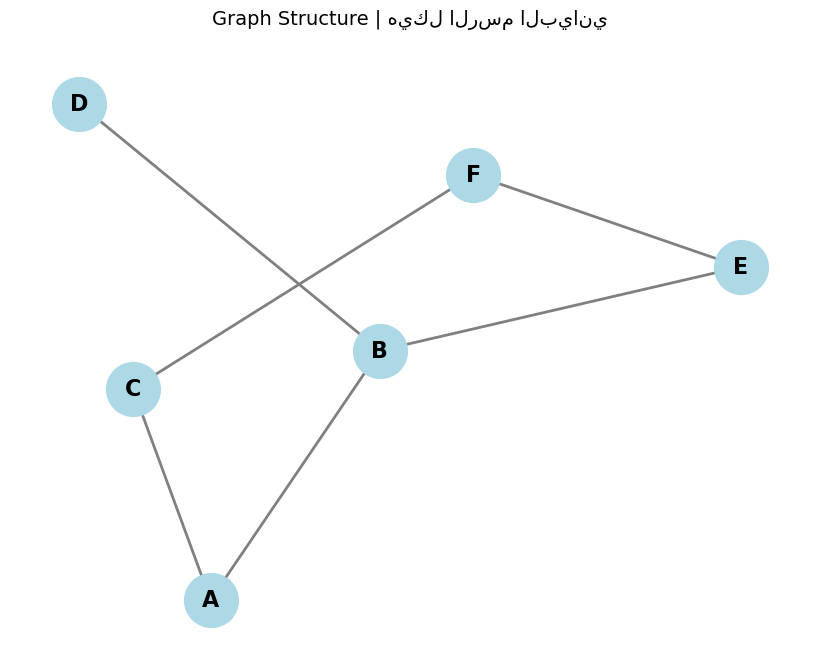

✅ Graph visualization displayed
Example 3: A* Algorithm
مثال 3: خوارزمية A*

Testing A* Algorithm
اختبار خوارزمية A*

Searching for optimal path from A to F...
البحث عن المسار الأمثل من A إلى F...
  Visiting: A, Path: A, Cost: 0
  Visiting: B, Path: A -> B, Cost: 1
  Visiting: C, Path: A -> C, Cost: 1
  Visiting: F, Path: A -> C -> F, Cost: 2

✓ Optimal path found! Path: A -> C -> F, Total cost: 2

Final Result: ['A', 'C', 'F']

Example completed successfully!
تم إكمال المثال بنجاح!


/var/folders/7n/l2c2z2x57871xg4f_0drsv1m0000gn/T/ipykernel_3604/2570700117.py:139: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


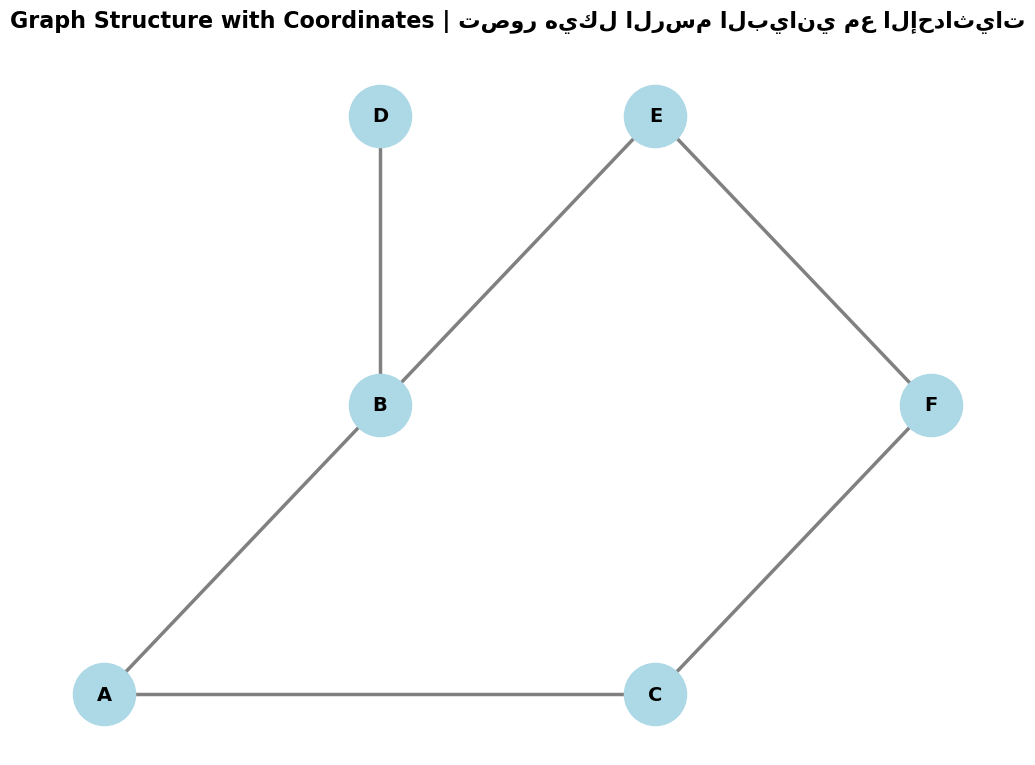


✅ Graph visualization displayed successfully!
تم عرض تصور الرسم البياني بنجاح!


In [1]:


# Visualization: Graph Structure
# تصور: هيكل الرسم البياني
try:
    import matplotlib.pyplot as plt
    import networkx as nx
    
    # Create a simple graph visualization
    G = nx.Graph()
    G.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'F'), ('E', 'F')])
    
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', 
            node_size=1500, font_size=16, font_weight='bold', 
            edge_color='gray', width=2)
    plt.title('Graph Structure | هيكل الرسم البياني', fontsize=14, pad=20)
    plt.tight_layout()
    plt.show()
    print("✅ Graph visualization displayed")
except ImportError:
    print("Note: Install matplotlib and networkx for graph visualization")
    print("ملاحظة: قم بتثبيت matplotlib و networkx لتصور الرسم البياني")

"""
Unit 2 - Example 3: A* Algorithm
الوحدة 2 - مثال 3: خوارزمية A*

This example demonstrates:
1. A* algorithm implementation
2. Heuristic functions
3. Optimal pathfinding
"""

import heapq

print("=" * 60)
print("Example 3: A* Algorithm")
print("مثال 3: خوارزمية A*")
print("=" * 60)

# Graph with coordinates for heuristic calculation
# الرسم البياني مع الإحداثيات لحساب الدالة الاستدلالية
graph = {
    'A': {'neighbors': ['B', 'C'], 'coords': (0, 0)},
    'B': {'neighbors': ['A', 'D', 'E'], 'coords': (1, 1)},
    'C': {'neighbors': ['A', 'F'], 'coords': (2, 0)},
    'D': {'neighbors': ['B'], 'coords': (1, 2)},
    'E': {'neighbors': ['B', 'F'], 'coords': (2, 2)},
    'F': {'neighbors': ['C', 'E'], 'coords': (3, 1)}
}

def heuristic(node1, node2):
    """
    Manhattan distance heuristic.
    دالة استدلالية بمسافة مانهاتن.
    """
    x1, y1 = graph[node1]['coords']
    x2, y2 = graph[node2]['coords']
    return abs(x1 - x2) + abs(y1 - y2)

def astar(graph, start, goal):
    """
    A* pathfinding algorithm.
    خوارزمية البحث عن المسار A*.
    """
    # Priority queue: (f_score, g_score, node, path)
    open_set = [(0, 0, start, [start])]
    visited = set()
    
    print(f"\nSearching for optimal path from {start} to {goal}...")
    print(f"البحث عن المسار الأمثل من {start} إلى {goal}...")
    
    while open_set:
        f_score, g_score, current, path = heapq.heappop(open_set)
        
        if current in visited:
            continue
        
        visited.add(current)
        
        print(f"  Visiting: {current}, Path: {' -> '.join(path)}, Cost: {g_score}")
        
        if current == goal:
            print(f"\n✓ Optimal path found! Path: {' -> '.join(path)}, Total cost: {g_score}")
            return path
        
        # Explore neighbors
        for neighbor in graph[current]['neighbors']:
            if neighbor in visited:
                continue
            
            # Calculate costs
            new_g_score = g_score + 1  # Assuming edge cost of 1
            h_score = heuristic(neighbor, goal)
            f_score = new_g_score + h_score
            
            heapq.heappush(open_set, (f_score, new_g_score, neighbor, path + [neighbor]))
    
    print(f"\n✗ No path found from {start} to {goal}")
    return None

# Test A*
print("\n" + "=" * 60)
print("Testing A* Algorithm")
print("اختبار خوارزمية A*")
print("=" * 60)

path = astar(graph, 'A', 'F')
print(f"\nFinal Result: {path}")

print("\n" + "=" * 60)
print("Example completed successfully!")
print("تم إكمال المثال بنجاح!")
print("=" * 60)

# Visualize the graph structure with coordinates (after algorithm execution)
# تصور هيكل الرسم البياني مع الإحداثيات (بعد تنفيذ الخوارزمية)
try:
    import matplotlib.pyplot as plt
    import networkx as nx
    
    # Create graph from the algorithm's graph structure
    G = nx.Graph()
    for node, data in graph.items():
        for neighbor in data['neighbors']:
            G.add_edge(node, neighbor)
    
    # Use actual coordinates for positioning
    pos = {node: data['coords'] for node, data in graph.items()}
    
    plt.figure(figsize=(10, 7))
    nx.draw(G, pos, with_labels=True, 
            node_color='lightblue', node_size=2000,
            font_size=14, font_weight='bold',
            edge_color='gray', width=2.5,
            arrows=False)
    plt.title('Graph Structure with Coordinates | تصور هيكل الرسم البياني مع الإحداثيات', fontsize=16, pad=20, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    print("\n✅ Graph visualization displayed successfully!")
    print("تم عرض تصور الرسم البياني بنجاح!")
except ImportError:
    print("\n📦 To see graph visualization, install:")
    print("   pip install matplotlib networkx")
    print("\nملاحظة: لرؤية التصور، قم بتثبيت:")
    print("   pip install matplotlib networkx")


---

## ✅ Summary | الملخص

Great job completing this example!

**What you learned:**
- Core concepts demonstrated in the code
- Practical implementation details

**Next steps:**
- Complete the exercises in `exercises/` folder
- Review the quiz materials
- Proceed to the next example

---

**💡 Tip:** If you see errors, make sure:
- All libraries are installed: `pip install -r requirements.txt`
- You're using Python 3.8+
- Cells are executed in order
